In [2]:
import pyarrow.parquet as pq
import pandas as pd
from clustergram import Clustergram
import sklearn
import cudf
import matplotlib.pyplot as plt
import pickle



# Import the complete case data and Groups

In [3]:
# Import complete cases
df = cudf.read_parquet('/rapids/my_data/usa.bg.cc.parquet')
# Import groups
gp = cudf.read_parquet('/rapids/my_data/data/usa.bg.cl.group.parquet') 

In [4]:
df

,GEOID,Male_Under_5_years,Male_5_to_9_years,Male_10_to_14_years,Male_15_to_17_years,Male_20_years,Male_21_years,Male_22_to_24_years,Male_25_to_29_years,Male_30_to_34_years,...,Tablet_or_other_portable_wireless_computer_with_no_other_type_of_computing_device,No_Computer,Dial_up_with_no_other_type_of_Internet_subscription,Cellular_data_plan_with_no_other_type_of_Internet_subscription,Broadband_such_as_cable_fiber_optic_or_DSL_with_no_other_type_of_Internet_subscription,Satellite_Internet_service,Internet_access_without_a_subscription,No_Internet_access,Under_18_With_a_broadband_Internet_subscription,Under_18_Without_an_Internet_subscription
0,020130001001,-3.955508,-6.000000,-6.000000,-5.763099,-4.455404,-6.000000,-3.057724,-2.303734,-2.705826,...,-3.423176,-2.197225,-6.000000,-3.263576,-3.001272,-2.386467,-3.610918,0.748939,-2.348726,-2.926739
1,020130001002,-3.458307,-3.514030,-3.283414,-4.406719,-4.720121,-6.000000,-3.485803,-3.173878,-3.736026,...,-3.964886,-1.584120,-6.000000,-3.708137,-2.519998,-2.559235,-3.252587,-0.522189,-1.785746,-2.477098
2,020130001003,-4.357563,-4.583265,-3.553615,-4.015954,-6.000000,-6.000000,-4.117753,-2.949777,-3.355153,...,-6.000000,-2.534720,-6.000000,-3.946424,-2.765060,-1.291259,-2.949439,-1.079744,-2.039596,-2.854082
3,020160001001,-3.263576,-3.652820,-3.324600,-3.048942,-3.946961,-4.649719,-5.465948,-3.001272,-2.770354,...,-4.590057,-2.436897,-6.000000,-1.986732,-2.746202,-2.308125,-3.311585,-1.318576,-1.203973,-2.877949
4,020160002001,-3.900909,-4.014261,-4.108226,-4.455932,-5.474893,-4.912130,-3.874401,-2.964944,-3.120895,...,-6.000000,-3.206803,-5.545177,-1.751486,-3.504556,-1.691018,-3.206803,-2.005018,-1.781771,-3.900625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236770,560459511001,-3.134890,-3.359537,-3.209880,-4.105591,-6.000000,-6.000000,-3.969702,-3.164269,-4.002041,...,-4.153661,-2.018559,-6.000000,-0.633800,-2.264897,-2.613117,-4.338597,-1.548813,-1.176574,-5.370056
236771,560459511002,-4.940343,-3.891162,-4.501116,-6.000000,-3.532359,-6.000000,-4.697228,-4.287193,-2.871452,...,-6.000000,-1.514128,-6.000000,-2.997455,-1.386294,-1.995539,-2.961831,-1.427794,-2.514836,-3.665963
236772,560459513001,-2.661693,-2.393339,-6.000000,-3.173704,-6.000000,-6.000000,-6.000000,-2.689457,-2.661693,...,-6.000000,-2.224072,-6.000000,-0.723179,-2.179642,-2.654095,-1.787119,-1.755058,-1.023043,-6.000000
236773,560459513002,-4.680706,-3.266200,-6.000000,-3.590076,-6.000000,-6.000000,-3.226991,-3.189153,-3.082945,...,-6.000000,-3.512540,-6.000000,-1.345764,-1.417966,-3.164068,-1.369487,-3.214868,-1.457516,-6.000000


In [5]:
gp

,GEOID,cluster
0,020130001001,6.0
1,020130001002,6.0
2,020130001003,6.0
3,020160001001,6.0
4,020160002001,7.0
...,...,...
236770,560459511001,3.0
236771,560459511002,3.0
236772,560459513001,3.0
236773,560459513002,6.0


In [4]:
# Set index
df = df.set_index('GEOID')
gp = gp.set_index('GEOID')

In [5]:
# Append clusters
df_merged = df.merge(gp, on=['GEOID'], how='left')

In [6]:
df_merged

,Male_Under_5_years,Male_5_to_9_years,Male_10_to_14_years,Male_15_to_17_years,Male_20_years,Male_21_years,Male_22_to_24_years,Male_25_to_29_years,Male_30_to_34_years,Male_35_to_39_years,...,No_Computer,Dial_up_with_no_other_type_of_Internet_subscription,Cellular_data_plan_with_no_other_type_of_Internet_subscription,Broadband_such_as_cable_fiber_optic_or_DSL_with_no_other_type_of_Internet_subscription,Satellite_Internet_service,Internet_access_without_a_subscription,No_Internet_access,Under_18_With_a_broadband_Internet_subscription,Under_18_Without_an_Internet_subscription,cluster
0,-3.186464,-3.531895,-5.223055,-4.016656,-4.183685,-3.956723,-5.581346,-3.353518,-5.447276,-2.393808,...,-2.679879,-6.000000,-1.301553,-2.679879,-3.323929,-2.352108,-2.900294,-1.343284,-6.000000,3.0
1,-6.000000,-3.482201,-3.821051,-3.913926,-6.000000,-6.000000,-5.364105,-6.000000,-6.000000,-4.070924,...,-2.003409,-6.000000,-1.363111,-3.401197,-2.592703,-6.000000,-2.003409,-1.999155,-6.000000,3.0
2,-3.102933,-3.668213,-3.873513,-2.857428,-6.000000,-6.000000,-4.285883,-3.314772,-4.695925,-2.879676,...,-1.469993,-6.000000,-1.200119,-3.716616,-1.071106,-4.010359,-1.233787,-1.565525,-6.000000,3.0
3,-6.000000,-3.381966,-2.054336,-4.765019,-3.687917,-6.000000,-6.000000,-4.562452,-5.580673,-2.624065,...,-2.677279,-6.000000,-1.673976,-6.000000,-1.430746,-6.000000,-1.652149,-1.256388,-2.783616,3.0
4,-2.989901,-2.918945,-3.947844,-2.601494,-5.185149,-6.000000,-6.000000,-6.000000,-2.918945,-3.235212,...,-2.140066,-6.000000,-1.075355,-6.000000,-1.836828,-2.833213,-1.235924,-1.066209,-2.989901,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236770,-3.838428,-3.967739,-2.930269,-5.647968,-6.000000,-4.251043,-2.972791,-3.767896,-4.251043,-3.580944,...,-2.067529,-6.000000,-2.390183,-2.301286,-3.056976,-3.491647,-1.365736,-1.255405,-6.000000,5.0
236771,-3.637586,-4.079654,-3.583519,-3.694577,-4.964940,-6.000000,-3.998201,-3.694577,-3.306671,-3.391219,...,-2.175833,-5.033701,-1.392373,-2.346070,-2.644270,-4.107590,-1.730799,-1.658642,-5.067506,3.0
236772,-3.711352,-3.293590,-2.682877,-3.688324,-5.435903,-4.677217,-4.247396,-4.738389,-4.371647,-3.580180,...,-2.335895,-4.238445,-1.189849,-2.486449,-2.234117,-3.825739,-2.155260,-1.069895,-6.000000,3.0
236773,-3.356897,-4.067316,-3.561600,-3.377796,-5.099866,-4.729428,-3.336397,-4.197202,-3.951930,-3.220979,...,-3.076390,-4.382027,-1.115142,-3.308717,-2.525729,-5.236442,-2.380703,-1.284207,-6.000000,3.0


In [7]:
# Count of Block Gropups by Cluster
df_merged.cluster.value_counts()

3.0    50341
4.0    39921
5.0    39038
6.0    34475
1.0    31219
7.0    26645
2.0    15136
Name: cluster, dtype: int32

In [8]:
#Split DF and remove cluster
groups = df_merged.groupby(df_merged.cluster)
df_merged_1 = groups.get_group(1)
df_merged_2 = groups.get_group(2)
df_merged_3 = groups.get_group(3)
df_merged_4 = groups.get_group(4)
df_merged_5 = groups.get_group(5)
df_merged_6 = groups.get_group(6)
df_merged_7 = groups.get_group(7)

#remove cluster column
del df_merged_1['cluster']
del df_merged_2['cluster']
del df_merged_3['cluster']
del df_merged_4['cluster']
del df_merged_5['cluster']
del df_merged_6['cluster']
del df_merged_7['cluster']

#convert to pandas
df_merged_1= df_merged_1.to_pandas()
df_merged_2= df_merged_2.to_pandas()
df_merged_3= df_merged_3.to_pandas()
df_merged_4= df_merged_4.to_pandas()
df_merged_5= df_merged_5.to_pandas()
df_merged_6= df_merged_6.to_pandas()
df_merged_7= df_merged_7.to_pandas()

In [12]:
#Fit Clustergrams
df_merged_1_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_1_cgram.fit(df_merged_1)

df_merged_2_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_2_cgram.fit(df_merged_2)

df_merged_3_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_3_cgram.fit(df_merged_3)

df_merged_4_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_4_cgram.fit(df_merged_4)

df_merged_5_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_5_cgram.fit(df_merged_5)

df_merged_6_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_6_cgram.fit(df_merged_6)

df_merged_7_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_7_cgram.fit(df_merged_7)


K=1 skipped. Mean computed from data directly.
K=2 fitted in 218.01058340072632 seconds.
K=3 fitted in 330.95849323272705 seconds.
K=4 fitted in 499.9652876853943 seconds.
K=5 fitted in 508.2421553134918 seconds.
K=6 fitted in 569.4915323257446 seconds.
K=7 fitted in 701.589072227478 seconds.
K=1 skipped. Mean computed from data directly.
K=2 fitted in 222.80284762382507 seconds.
K=3 fitted in 242.68712615966797 seconds.
K=4 fitted in 284.8031098842621 seconds.
K=5 fitted in 287.57917523384094 seconds.
K=6 fitted in 383.72654819488525 seconds.
K=7 fitted in 432.5173807144165 seconds.
K=1 skipped. Mean computed from data directly.
K=2 fitted in 304.86894059181213 seconds.
K=3 fitted in 394.44291472435 seconds.
K=4 fitted in 383.5558638572693 seconds.
K=5 fitted in 639.6288297176361 seconds.
K=6 fitted in 669.5563337802887 seconds.
K=7 fitted in 733.8096475601196 seconds.
K=1 skipped. Mean computed from data directly.
K=2 fitted in 262.7904210090637 seconds.
K=3 fitted in 310.05013680458

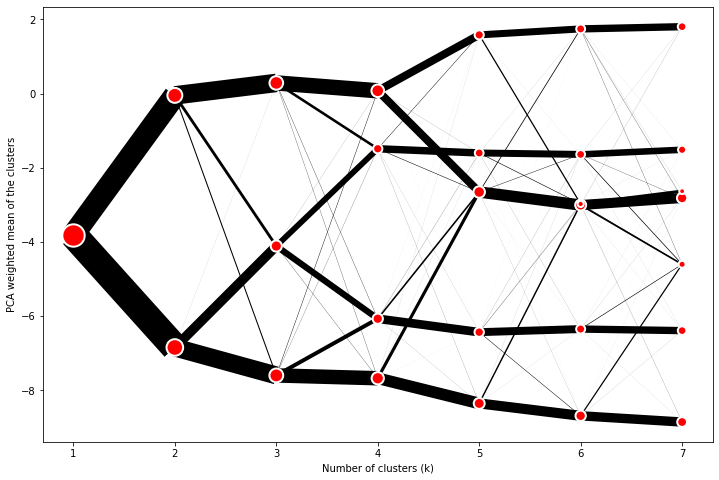

In [12]:
df_merged_1_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C1.pdf') #4 or 5

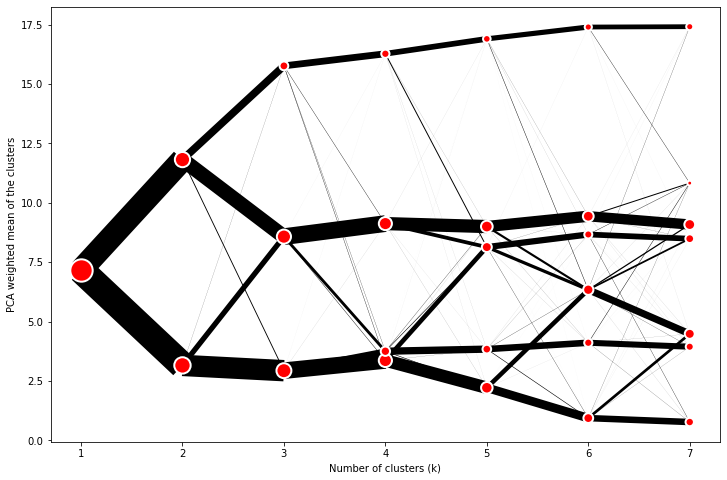

In [13]:
df_merged_2_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C2.pdf') # 3 or 5

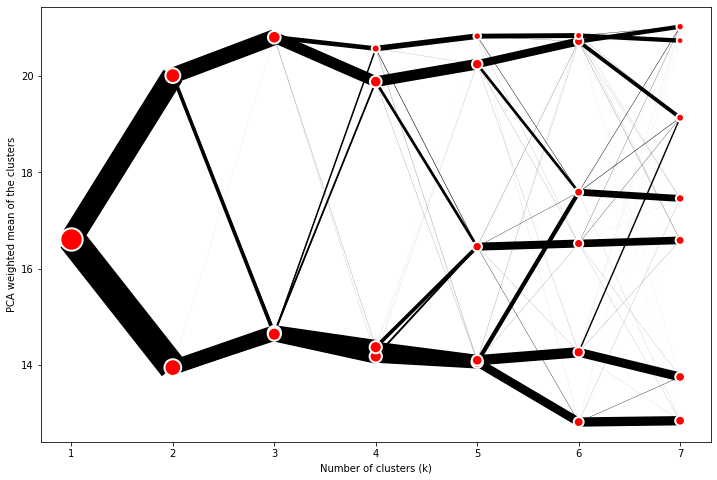

In [14]:
df_merged_3_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C3.pdf') #2 and 6/7

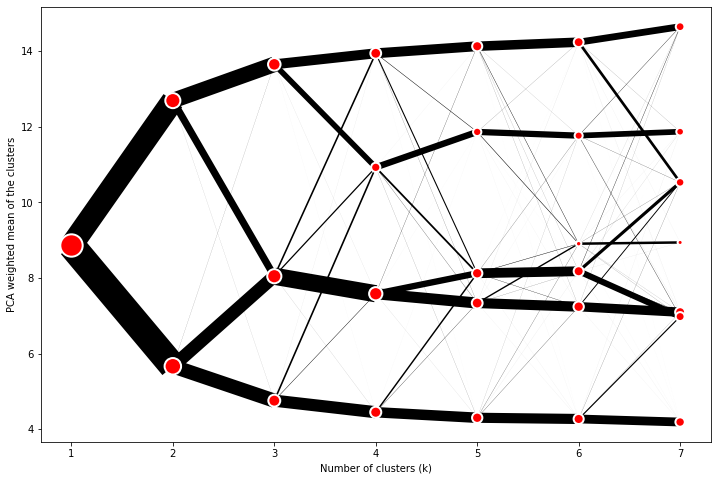

In [15]:
df_merged_4_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C4.pdf') #4

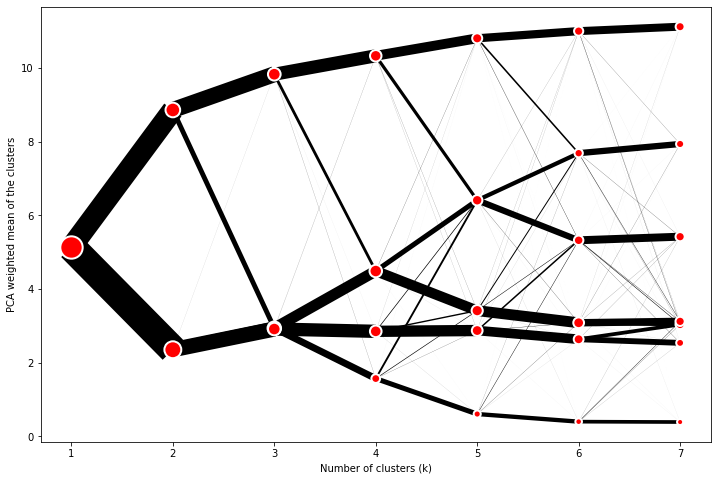

In [16]:
df_merged_5_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C5.pdf') # 2 or 4

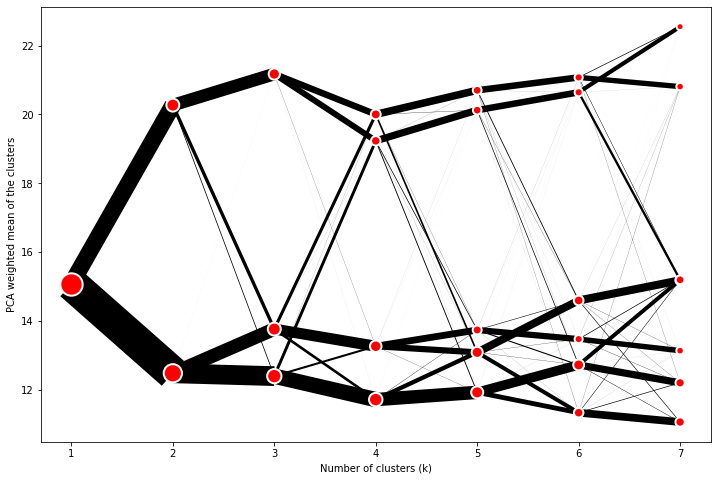

In [17]:
df_merged_6_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C6.pdf') # 3

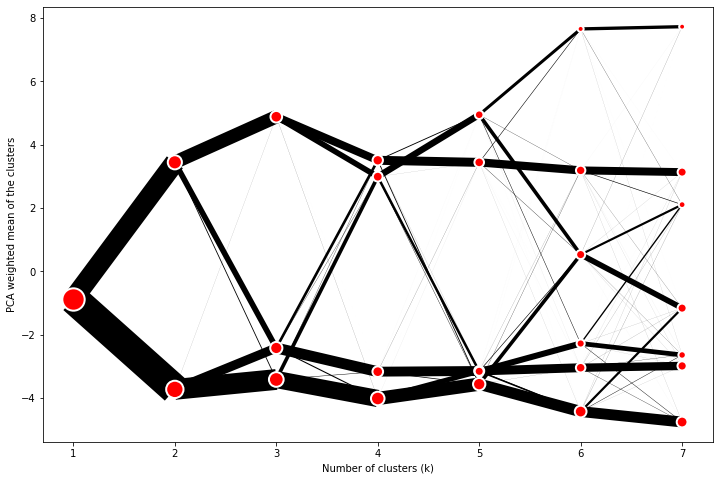

In [18]:
df_merged_7_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C7.pdf') #6

<AxesSubplot:xlabel='Number of clusters (k)', ylabel='Mean of the clusters'>

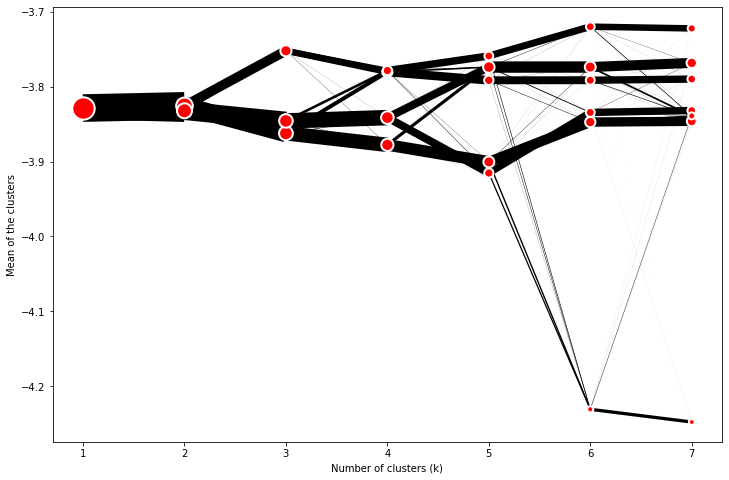

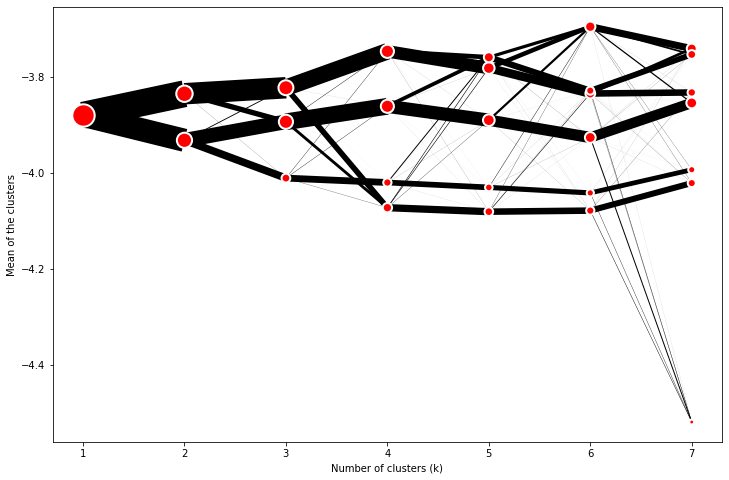

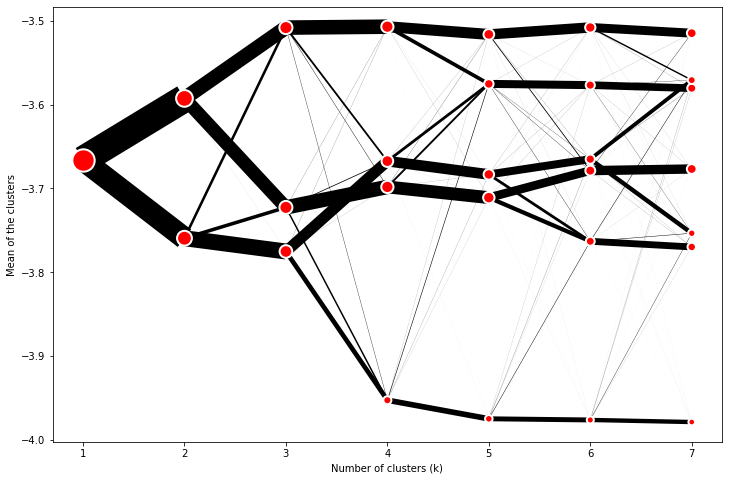

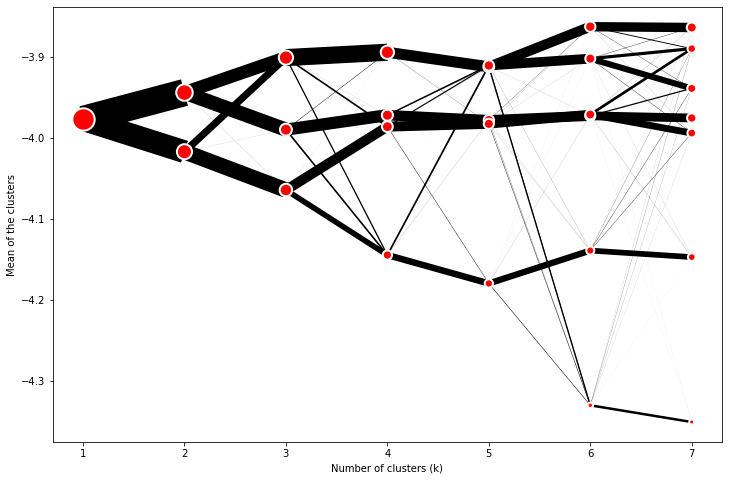

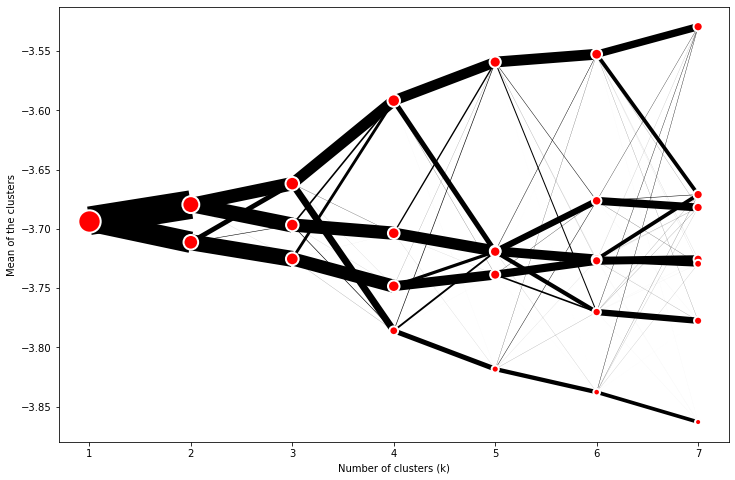

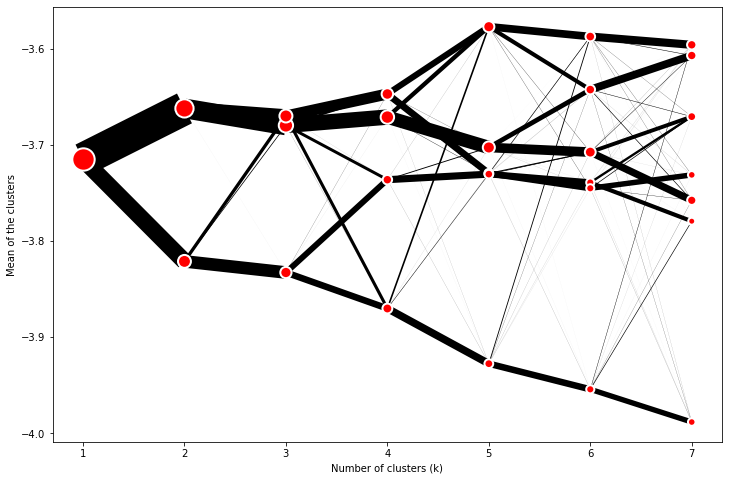

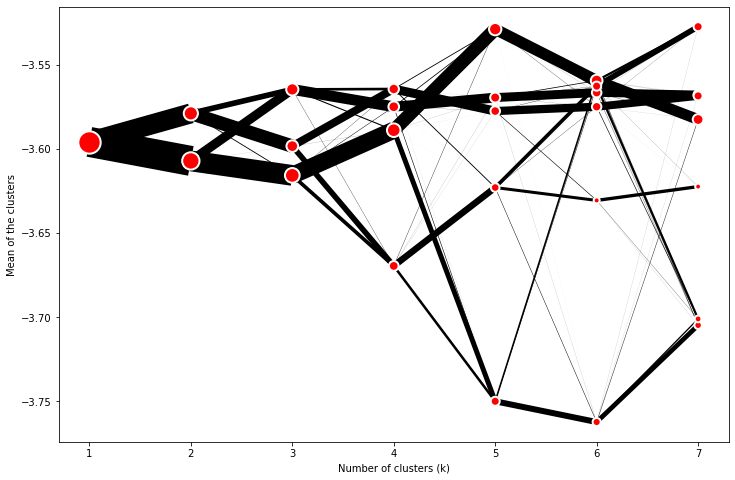

In [13]:
df_merged_1_cgram.plot(figsize=(12, 8), pca_weighted=False)

df_merged_2_cgram.plot(figsize=(12, 8), pca_weighted=False)
df_merged_3_cgram.plot(figsize=(12, 8), pca_weighted=False)
df_merged_4_cgram.plot(figsize=(12, 8), pca_weighted=False)
df_merged_5_cgram.plot(figsize=(12, 8), pca_weighted=False)
df_merged_6_cgram.plot(figsize=(12, 8), pca_weighted=False)
df_merged_7_cgram.plot(figsize=(12, 8), pca_weighted=False)
